Для выполнения этого задания вам понадобятся данные о кредитных историях клиентов одного из банков. Поля в предоставляемых данных имеют следующий смысл:

LIMIT_BAL: размер кредитного лимита (в том числе и на семью клиента)

SEX: пол клиента (1 = мужской, 2 = женский )

EDUCATION: образование (0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных ).

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

AGE: возраст в годах

PAY_0 - PAY_6 : История прошлых платежей по кредиту. PAY_6 - платеж в апреле, ... Pay_0 - платеж в сентябре. Платеж = (0 =      исправный платеж, 1=задержка в один месяц, 2=задержка в 2 месяца ...)

BILL_AMT1 - BILL_AMT6: задолженность, BILL_AMT6 - на апрель, BILL_AMT1 - на сентябрь

PAY_AMT1 - PAY_AMT6: сумма уплаченная в PAY_AMT6 - апреле, ..., PAY_AMT1 - сентябре

default - индикатор невозврата денежных средств


In [1]:
import pandas as pd
data = pd.read_csv('C:\\Users\\user\\Desktop\\credit.csv', sep=",", header=0)
print(data.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')


In [2]:
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# задание 1
Размер кредитного лимита (LIMIT_BAL). В двух группах, тех людей, кто вернул кредит (default = 0) и тех, кто его не вернул (default = 1) проверьте гипотезы: a) о равенстве медианных значений кредитного лимита с помощью подходящей интервальной оценки b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

In [3]:
positive_return_LB_list = data[data.default == 0]['LIMIT_BAL'].values.tolist()
negative_return_LB_list = data[data.default == 1]['LIMIT_BAL'].values.tolist()
# проверяем гипотезу о равенстве медиан. но сначала посмотрим на форму распределений LB:

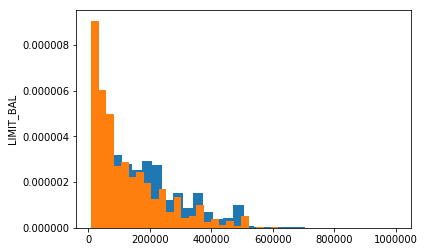

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(positive_return_LB_list, normed=True, bins=30)
plt.hist(negative_return_LB_list, normed=True, bins=30)
plt.ylabel('LIMIT_BAL')

In [5]:
# критерий Манна-Уитни должен решить задачу
from scipy.stats import mannwhitneyu

print('one-sided', mannwhitneyu(negative_return_LB_list, positive_return_LB_list, use_continuity=True, alternative='less'))
print('two-sided', mannwhitneyu(negative_return_LB_list, positive_return_LB_list, use_continuity=True, alternative='two-sided'))
print(np.median(positive_return_LB_list)/np.median(negative_return_LB_list))

one-sided MannwhitneyuResult(statistic=59257217.5, pvalue=6.127742909111652e-190)
two-sided MannwhitneyuResult(statistic=59257217.5, pvalue=1.2255485818223303e-189)
1.6666666666666667


### 1а. 
Если принять за истину предположение о том, что платежеспособность меньше у категории людей, которые не вернули кредит (default = 1),  то можно смело отвергать гипотезу о равенстве медиан в 2 группах на уровне значимости 6,12*10^-190. В случае отсутствия исходных предположений мы так же можем отвегнуть гипотезу на уровне значимости 1,22*10^-189.
С практической точки зрения различие медиан в 1,67 раз, что значительно.

In [6]:
#теперь проверим гипотезу о равенстве распределений (визуально они отличаются)
from scipy import stats

# воспользуемся перестановочным критерием для определения смещенности распределения 2х выборок.
# для упрощения в ущерб точности возьмем 1000 перестановок
np.random.seed(0)

def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)
    
print ("p-value: %f" % permutation_test(positive_return_LB_list, negative_return_LB_list, max_permutations = 1000))
print(np.mean(positive_return_LB_list)/np.mean(negative_return_LB_list))

p-value: 0.001000
1.3688432586435533


### 1b.
И правда, гипотезу о равенстве распределений можно уверенно отвергнуть на уровне значтмости 0.001. Смещение между средними в 1,36 раз, что значимо.

# задание 2
Пол (SEX): Проверьте гипотезу о том, что гендерный состав группы людей вернувших и не вернувших кредит отличается. Хорошо, если вы предоставите несколько различных решений этой задачи (с помощью доверительного интервала и подходящего статистического критерия)

In [29]:
import scipy

# женщина - 1; мужчина - 0
positive_return_SEX_list = data[data.default == 0]['SEX'].values.tolist()
positive_return_SEX_list = [1 if x == 2 else 0 for x in positive_return_SEX_list]
negative_return_SEX_list = data[data.default == 1]['SEX'].values.tolist()
negative_return_SEX_list = [1 if x == 2 else 0 for x in negative_return_SEX_list]
# У нас бинарные данные. и распределение соответствующее, что очевидно.

In [33]:
#для начала посмотрим на то, что нам даст биномиальный критерий и доверительные интервалы 2 наборов данных
import scipy
from statsmodels.stats.proportion import proportion_confint

p_value = scipy.stats.binom_test(sum(positive_return_SEX_list), n=len(positive_return_SEX_list), p=0.5, alternative='two-sided')
print('p_value sex distrib добросовестные должники', p_value)
p_value = scipy.stats.binom_test(sum(negative_return_SEX_list), n=len(negative_return_SEX_list), p=0.5, alternative='two-sided')
print('p_value sex distrib недобросовестные должники', p_value)

print('95 дов инт пол добросовестные должники', proportion_confint(sum(positive_return_SEX_list), len(positive_return_SEX_list), method = 'wilson'))
print('95 дов инт пол недобросовестные должники', proportion_confint(sum(negative_return_SEX_list), len(negative_return_SEX_list), method = 'wilson'))

# уже понятно, что доля женщин среди добросовестных заемщиков больше, также ясно, что в целом щенщины чаще берут кредит,
# и с высоким уровнем значимости можно отвергнуть гипотезу о том, что распределение полов равномерно 50/50 среди заемщиков.
# НО! нас просят посчитать то как гендерный состав группы людей вернувших и не вернувших кредит отличается.

p_value sex distrib добросовестные должники 4.8083897998530436e-269
p_value sex distrib недобросовестные должники 8.3397366690338e-28
95 дов инт пол добросовестные должники (0.607889734030124, 0.6203726841910749)
95 дов инт пол недобросовестные должники (0.5551017630282817, 0.578937581965066)


In [36]:
#нужен Z-критерий для разности долей (независимые выборки)
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)
  
print ("95%% confidence interval for a difference between proportions", proportions_diff_confint_ind(positive_return_SEX_list, negative_return_SEX_list))
print ("p-value: ", proportions_diff_z_test(proportions_diff_z_stat_ind(positive_return_SEX_list, negative_return_SEX_list)))
print ("p-value: ", proportions_diff_z_test(proportions_diff_z_stat_ind(positive_return_SEX_list, negative_return_SEX_list), 'greater'))

95%% confidence interval for a difference between proportions (0.03363493274962867, 0.060548077974896725)
p-value:  4.472866521609831e-12
p-value:  2.2364332608049153e-12


### 2.
Мы приняли обозначения (женщины - 1, мужчины - 0). По 95% доверительному интервалу мы получаем вывод, что гендерный состав группы людей вернувших и не вернувших кредит отличается и доля женщин среди полностью вернувших долг по кредиту больше доли женщин среди недобросовестных заемщиков на [3.36%, 6.05%] (при не более 5% вероятности ошибки первого рода). При двусторонней альтернативе на уровне значимости 4,47*10^-12 отвергаем гипотезу о равном гендерном составе среди рассматриваемых групп должников

# задание 3
Образование (EDUCATION): Проверьте гипотезу о том, что образование не влияет на то, вернет ли человек долг. Предложите способ наглядного представления разницы в ожидаемых и наблюдаемых значениях количества человек вернувших и не вернувших долг. Например, составьте таблицу сопряженности "образование" на "возврат долга", где значением ячейки была бы разность между наблюдаемым и ожидаемым количеством человек. Как бы вы предложили модифицировать таблицу так, чтобы привести значения ячеек к одному масштабу не потеряв в интерпретируемости ? Наличие какого образования является наилучшим индикатором того, что человек отдаст долг ? наоборт, не отдаст долг ?

EDUCATION:

0 = доктор, 1 = магистр; 2 = бакалавр; 3 = выпускник школы; 4 = начальное образование; 5= прочее; 6 = нет данных

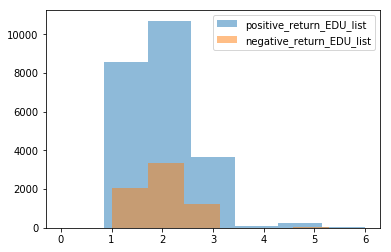

In [39]:
import matplotlib.pyplot as plt
import numpy as np

positive_return_EDU_list = data[data.default == 0]['EDUCATION'].values.tolist()
negative_return_EDU_list = data[data.default == 1]['EDUCATION'].values.tolist()

%matplotlib inline
plt.hist(positive_return_EDU_list, 7, alpha=0.5, label='positive_return_EDU_list')
plt.hist(negative_return_EDU_list, 7, alpha=0.5, label='negative_return_EDU_list')
plt.legend(loc='upper right')
plt.show()


In [52]:
# соберем таблицу сопряженности
def _constuct_list (aa):
    doctors = 0
    mags = 0
    bachs = 0
    schools = 0
    start_ed = 0
    other = 0
    empt = 0
    for i in aa:
        if i == 0:
            doctors += 1
        if i == 1:
            mags += 1
        if i == 2:
            bachs += 1
        if i == 3:
            schools += 1
        if i == 4:
            start_ed += 1
        if i == 5:
            other += 1
        if i == 6:
            empt += 1 
    return([doctors, mags, bachs, schools, start_ed, other, empt])
    
pos_edu_pop = _constuct_list(positive_return_EDU_list)
neg_edu_pop = _constuct_list(negative_return_EDU_list)
#найдем распределение людей по образовательному статусу среди всех заемщиков
all_edu_pop = np.array(pos_edu_pop) + np.array(neg_edu_pop)

print(pos_edu_pop, neg_edu_pop)

[14, 8549, 10700, 3680, 116, 262, 43] [0, 2036, 3330, 1237, 7, 18, 8]


In [44]:
import numpy as np
from scipy.stats import chi2_contingency

'''
На лекции вроде бы говорили про 5 единиц в ожидаемых величинах.

An often quoted guideline for the validity of this calculation 
is that the test should be used only if the observed and expected 
frequency in each cell is at least 5.

return:
(The test statistic, The p-value of the test, Degrees of freedom,
expected : ndarray)

The expected frequencies, based on the marginal sums of the table.'''
observed_cons_table = np.array([pos_edu_pop, neg_edu_pop])
expected_cons_table = chi2_contingency(observed_cons_table)[3]

chi2_contingency(observed_cons_table)

(163.21655786997073,
 1.2332626245415605e-32,
 6,
 array([[1.0903200e+01, 8.2435980e+03, 1.0926564e+04, 3.8293596e+03,
         9.5792400e+01, 2.1806400e+02, 3.9718800e+01],
        [3.0968000e+00, 2.3414020e+03, 3.1034360e+03, 1.0876404e+03,
         2.7207600e+01, 6.1936000e+01, 1.1281200e+01]]))

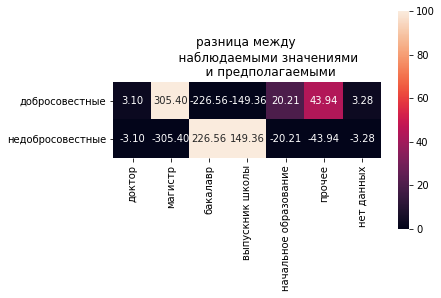

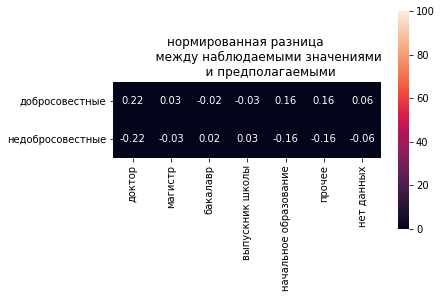

In [56]:
# количество людей среди 2 групп должников отличается очень сильно, для адекватной визуализации
# нам нужно нормировать полученные различия между этими группами на что-то, что даст хорошую взвешенную картину
# вычтем наблюдаемые значения из предполагаемых и нормируем результат поэлементно на распределение по образованию среди всех должников 

import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

conf_arr = observed_cons_table - expected_cons_table

df_cm = pd.DataFrame(conf_arr, 
                  index = ['добросовестные', 'недобросовестные'],
                  columns = ['доктор', 'магистр', 'бакалавр', 'выпускник школы', 'начальное образование', 'прочее', 'нет данных'])

%matplotlib inline
fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f')
plt.title('''разница между 
            наблюдаемыми значениями 
            и предполагаемыми''')

df_cm = pd.DataFrame(conf_arr/all_edu_pop, 
                  index = ['добросовестные', 'недобросовестные'],
                  columns = ['доктор', 'магистр', 'бакалавр', 'выпускник школы', 'начальное образование', 'прочее', 'нет данных'])

fig = plt.figure()
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f')
plt.title('''нормированная разница 
            между наблюдаемыми значениями 
            и предполагаемыми''')

### 3
По результатам хи квадрат можем отвергнуть нулевую гипотезу о невлиянии образования на платежеспособность с достигаемым уровнем значимости в 1,2*10^-32. Также можно утверждать, что доктора наук являются самыми добросовестными заемщиками, а люди, получившие только начальное образование чаще остальных долг не возвращают.

# задание 4
Семейное положение (MARRIAGE): Проверьте, как связан семейный статус с индикатором дефолта: нужно предложить меру, по которой можно измерить возможную связь этих переменных и посчитать ее значение.

MARRIAGE: (0 = отказываюсь отвечать; 1 = замужем/женат; 2 = холост; 3 = нет данных).

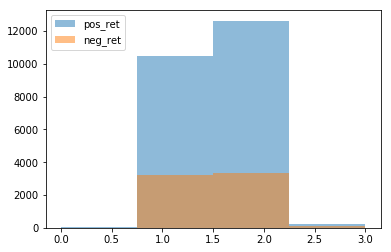

In [104]:
# поступим аналогично
positive_return_MAR_list = data[data.default == 0]['MARRIAGE'].values.tolist()
negative_return_MAR_list = data[data.default == 1]['MARRIAGE'].values.tolist()

%matplotlib inline
plt.hist(positive_return_MAR_list, 4, alpha=0.5, label='pos_ret')
plt.hist(negative_return_MAR_list, 4, alpha=0.5, label='neg_ret')
plt.legend(loc='upper left')
plt.show()

У нас крайне мало тех, кто отказался отвечать на вопрос о семейном положении и тех, о ком нет данных. Уберем эти категории

In [105]:
import math

positive_return_MAR_list = [x for x in positive_return_MAR_list if (x != 0 and x != 3)]
negative_return_MAR_list = [x for x in negative_return_MAR_list if (x != 0 and x != 3)]

# сменим кодировку. примем за 0 семейных и за 1 холостых людей
positive_return_MAR_list = np.array(positive_return_MAR_list)-1
negative_return_MAR_list = np.array(negative_return_MAR_list)-1

single_pos = sum(positive_return_MAR_list)
family_pos = len(positive_return_MAR_list) - single_pos

single_neg = sum(negative_return_MAR_list)
family_neg = len(negative_return_MAR_list) - single_neg

#применим доверительный интервал для разноти долей одиноких людей в группе добросовестных и недобросовестных должников
 
import scipy.stats as st

def proportions_confint_diff_ind(cases1, cases2 ,sample1, sample2, alpha = 0.05):    
    z = st.norm.ppf(.975)#scipy.stats.norm.ppf((1 - alpha)/ 2)   
    p1 = cases1 / sample1
    p2 = cases2 / sample2
    
    left_boundary = abs(p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ sample1 + p2 * (1 - p2)/ sample2)
    right_boundary = abs(p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ sample1 + p2 * (1 - p2)/ sample2)
    
    return (left_boundary, right_boundary)
print(proportions_confint_diff_ind(single_pos, family_pos ,single_pos+single_neg, family_pos+family_neg, alpha = 0.05))

(0.015928989280945424, 0.03493830824728596)


### 4
95% доверительный интервал разности долей между добросовестными одиночками и добросовестными семьянинами не содержит ноль: [0.016, 0.035]. То есть можно полагать, что одинокие люди будут более добросовестными плательщиками. 

# задание 5
Возраст (AGE): Относительно двух групп людей вернувших и не вернувших кредит проверьте следующие гипотезы: a) о равенстве медианных значений возрастов людей b) о равенстве распределений с помощью одного из подходящих непараметрических критериев проверки равенства средних. Значимы ли полученные результаты с практической точки зрения ?

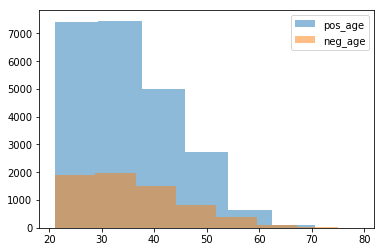

In [7]:
positive_return_AGE_list = data[data.default == 0]['AGE'].values.tolist()
negative_return_AGE_list = data[data.default == 1]['AGE'].values.tolist()

%matplotlib inline
plt.hist(positive_return_AGE_list, 7, alpha=0.5, label='pos_age')
plt.hist(negative_return_AGE_list, 7, alpha=0.5, label='neg_age')
plt.legend(loc='upper right')
plt.show()


In [8]:
from scipy.stats import mannwhitneyu

print('one-sided', mannwhitneyu(negative_return_AGE_list, positive_return_AGE_list, use_continuity=True, alternative='less'))
print('two-sided', mannwhitneyu(negative_return_AGE_list, positive_return_AGE_list, use_continuity=True, alternative='two-sided'))
print(np.median(positive_return_AGE_list)/np.median(negative_return_AGE_list))

one-sided MannwhitneyuResult(statistic=78076624.5, pvalue=0.813748659064307)
two-sided MannwhitneyuResult(statistic=78076624.5, pvalue=0.3725035434898616)
1.0


### 5a
По результату критерия Манна-Уитни гипотеза о равенстве медиан возрастов в 2 группах не отвергается.

In [12]:
# воспользуемся перестановочным критерием для определения смещенности распределения 2х выборок.
# для упрощения в ущерб точности возьмем 1000 перестановок
np.random.seed(0)

def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)
    
print ("p-value: %f" % permutation_test(positive_return_AGE_list, negative_return_AGE_list, max_permutations = 1000))
print(np.mean(positive_return_AGE_list)/np.mean(negative_return_AGE_list))

p-value: 0.019000
0.9913655383670577


### 5b
Перестановочный критерий говорит нам, что уже на уровне значимости 2% мы можем отвергнуть нулевую гипотезу о равенстве средних возрастов в 2 группах заемщиков. Однако с практический уровень значимости этой разницы меньше 1%, что не так значимо. 